# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

outdoor = pd.read_csv('CSV_FILES/20230215-160202_aq_pth.csv')
indoor = pd.read_csv('CSV_FILES/20230222-144631_aq_pth.csv')
outdoor = outdoor[-300:]
indoor = indoor.drop("Unnamed: 10", axis='columns')
indoor = indoor.drop("Local Time", axis='columns')
outdoor = outdoor.drop("Unnamed: 10", axis='columns')
outdoor = outdoor.drop("Local Time", axis='columns')

In [32]:
def plotCSV(df, title):
    plt.plot(df['Unix Time'], df['PM1.0'], label = '1 µm')
    plt.plot(df['Unix Time'], df['PM2.5'], label = '2.5 µm')
    plt.plot(df['Unix Time'], df['PM10'], label = '10 µm')
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Parts per million")
    plt.title(title + " - Particulate")
    plt.show()
    
    plt.figure(figsize = (20, 10))
    plt.subplot(2, 3, 1)
    plt.plot(df['Unix Time'], df['Temperature'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Temperature - ˚C")
    plt.title("Temperature")
    plt.subplot(2, 3, 2)
    plt.plot(df['Unix Time'], df['Gas'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Resistance - Ohms")
    plt.title("Gas")
    plt.subplot(2, 3, 3)
    plt.plot(df['Unix Time'], df['Humidity'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Humidity - Percent")
    plt.title("Humidity")
    plt.subplot(2, 3, 4)
    plt.plot(df['Unix Time'], df['Pressure'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Pressure - hPa")
    plt.title("Pressure")
    plt.subplot(2, 3, 5)
    plt.plot(df['Unix Time'], df['Altitude'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Altitude - meters")
    plt.title("Altitude")
    
    plt.suptitle(title, fontsize = 20)
    plt.show()

In [33]:
def plotCSVoverlap(df1, df2, title1, title2):
    x = np.arange(0,df1.shape[0])
    
    plt.figure(figsize = (20, 5))
    plt.plot(x, df1['PM1.0'], label = '1 µm - ' + title1)
    plt.plot(x, df1['PM2.5'], label = '2.5 µm - ' + title1)
    plt.plot(x, df1['PM10'], label = '10 µm - ' + title1)
    plt.plot(x, df2['PM1.0'], label = '1 µm - ' + title2)
    plt.plot(x, df2['PM2.5'], label = '2.5 µm - ' + title2)
    plt.plot(x, df2['PM10'], label = '10 µm - ' + title2)
    
    plt.legend(loc='best')
    plt.xlabel("Time since start - seconds")
    plt.ylabel("Parts per million")
    plt.title("Particulate", fontsize = 20)
    plt.show()
    
    plt.figure(figsize = (20, 10))
    plt.subplot(2, 3, 1)
    plt.plot(x, df1['Temperature'], label = title1)
    plt.plot(x, df2['Temperature'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Temperature - ˚C")
    plt.title("Temperature")
    plt.subplot(2, 3, 2)
    plt.plot(x, df1['Gas'], label = title1)
    plt.plot(x, df2['Gas'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Resistance - Ohms")
    plt.title("Gas")
    plt.subplot(2, 3, 3)
    plt.plot(x, df1['Humidity'], label = title1)
    plt.plot(x, df2['Humidity'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Humidity - Percent")
    plt.title("Humidity")
    plt.subplot(2, 3, 4)
    plt.plot(x, df1['Pressure'], label = title1)
    plt.plot(x, df2['Pressure'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Pressure - hPa")
    plt.title("Pressure")
    plt.subplot(2, 3, 5)
    plt.plot(x, df1['Altitude'], label = title1)
    plt.plot(x, df2['Altitude'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Altitude - meters")
    plt.title("Altitude")
    
    plt.suptitle("PTH Data", fontsize = 20)
    plt.show()

In [44]:
def plotCSVhist(df1, df2, title1, title2):
    
    plt.hist(df1['PM1.0'], alpha = 3/4, label = '1 µm - ' + title1)
    plt.hist(df2['PM1.0'], alpha = 3/4, label = '1 µm - ' + title2)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")
    plt.title("1 $\mu$m particles")
    plt.legend(loc = 'best')
    plt.show()
    
    plt.hist(df1['PM2.5'], alpha = 3/4, label = '2.5 µm - ' + title1)
    plt.hist(df2['PM2.5'], alpha = 3/4, label = '2.5 µm - ' + title2)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")
    plt.title("2.5 $\mu$m particles")
    plt.legend(loc = 'best')
    plt.show()
    
    plt.hist(df1['PM10'], alpha = 3/4, label = '10 µm - ' + title1)
    plt.hist(df2['PM10'], alpha = 3/4, label = '10 µm - ' + title2)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")
    plt.title("10 $\mu$m particles")
    plt.legend(loc = 'best')
    plt.show()
    
    x = np.arange(0,300)
    
    plt.figure(figsize = (20, 10))
    plt.subplot(2, 3, 1)
    plt.hist(df1['Temperature'], alpha = 3/4, label = title1)
    plt.hist(df2['Temperature'], alpha = 3/4, label = title2)
    plt.legend(loc='best')
    plt.xlabel("Temperature - ˚C")
    plt.ylabel("Frequency")
    plt.title("Temperature")
    
    plt.subplot(2, 3, 2)
    plt.hist(df1['Gas'], alpha = 3/4, label = title1)
    plt.hist(df2['Gas'], alpha = 3/4, label = title2)
    plt.legend(loc='best')
    plt.xlabel("Resistance - Ohms")
    plt.ylabel("Frequency")
    plt.title("Gas")
    
    plt.subplot(2, 3, 3)
    plt.hist(df1['Humidity'], alpha = 3/4, label = title1)
    plt.hist(df2['Humidity'], alpha = 3/4, label = title2)
    plt.legend(loc='best')
    plt.xlabel("Humidity - Percent")
    plt.ylabel("Frequency")
    plt.title("Humidity")
    
    plt.subplot(2, 3, 4)
    plt.hist(df1['Pressure'], alpha = 3/4, label = title1)
    plt.hist(df2['Pressure'], alpha = 3/4, label = title2)
    plt.legend(loc='best')
    plt.xlabel("Pressure - hPa")
    plt.ylabel("Frequency")
    plt.title("Pressure")
    
    plt.subplot(2, 3, 5)
    plt.hist(df1['Altitude'], alpha = 3/4, label = title1)
    plt.hist(df2['Altitude'], alpha = 3/4, label = title2)
    plt.legend(loc='best')
    plt.xlabel("Altitude - meters")
    plt.ylabel("Frequency")
    plt.title("Altitude")
    
    plt.suptitle("PTH Data", fontsize = 20)
    plt.show()

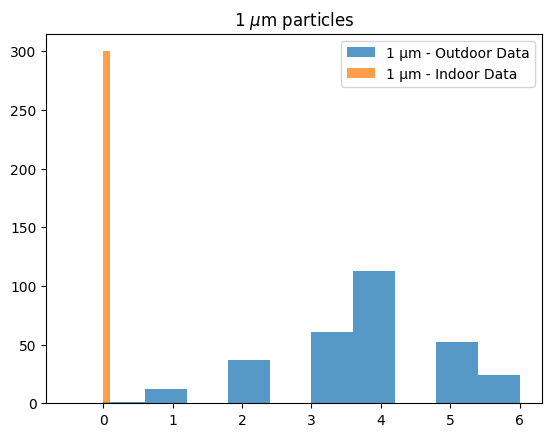

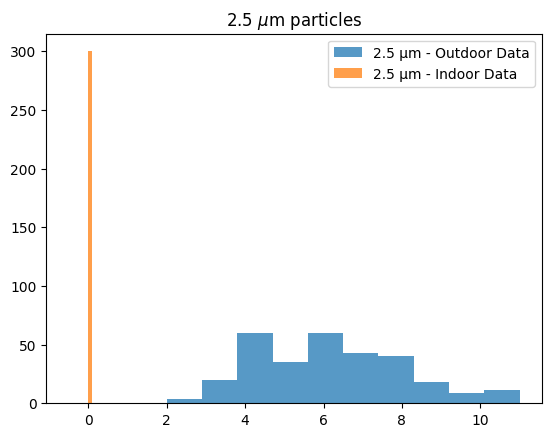

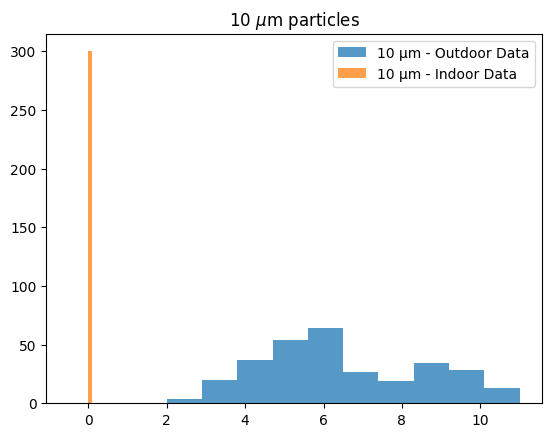

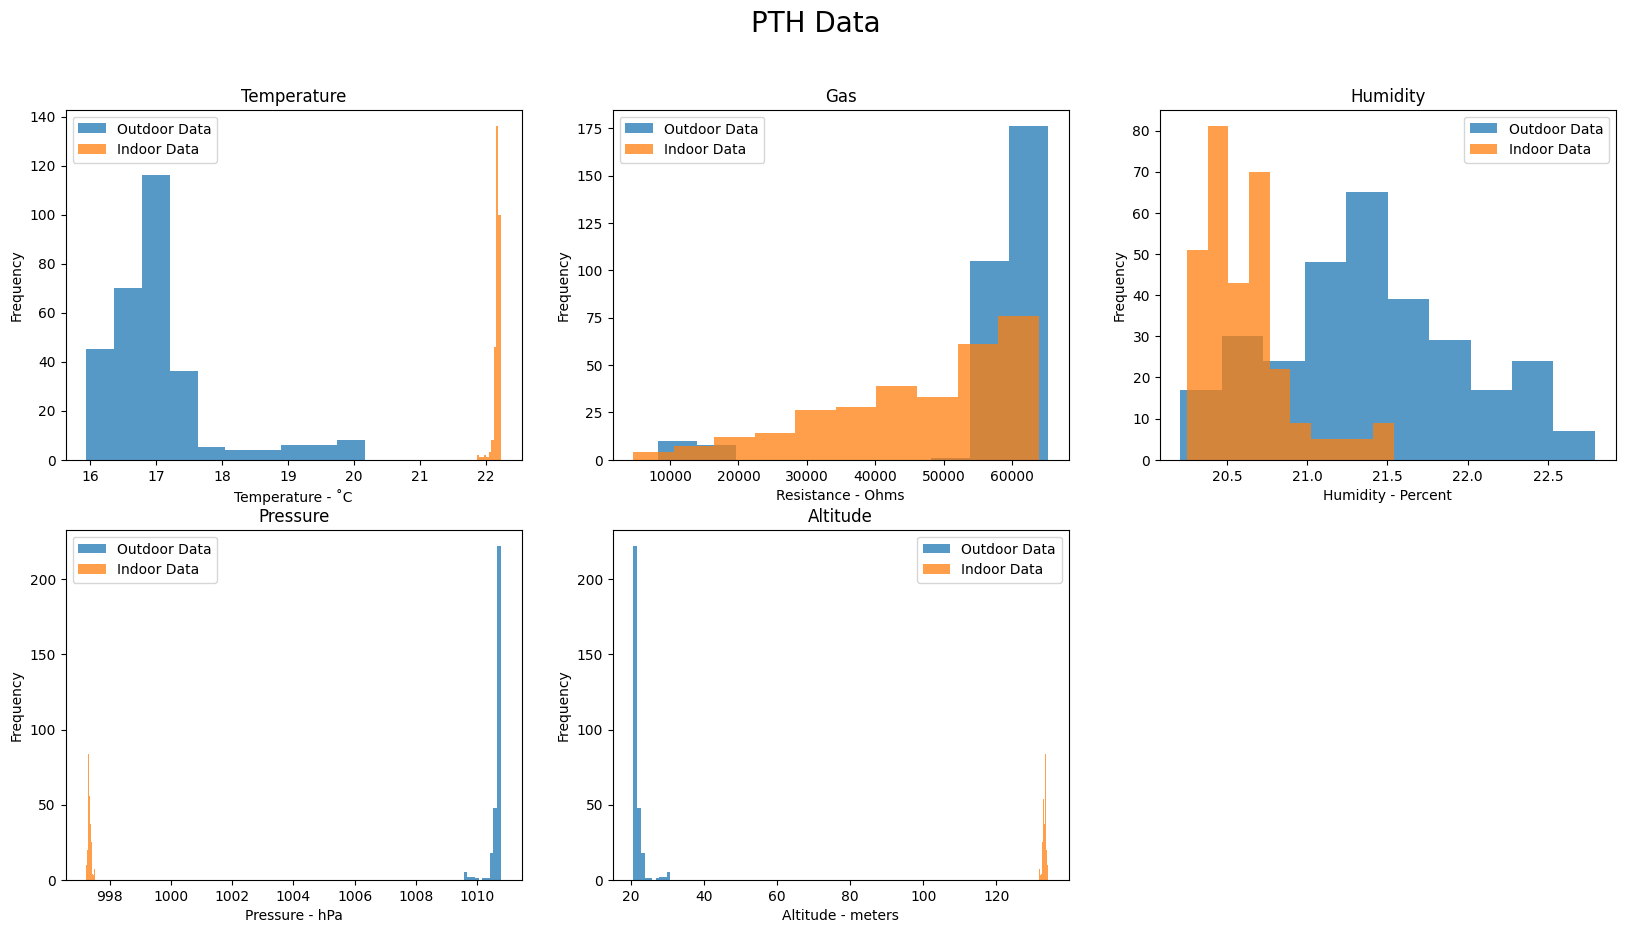

In [35]:
plotCSVhist(outdoor, indoor, "Outdoor Data", "Indoor Data")

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

The temperature and humidity look Gaussian to a first approximation. The gas is a little more sketchy. I feel like it should be Gaussian, but if you plot the time behavior you see it increases as about $\sqrt{t}$. So I think our gas detector was still getting up to full effectiveness while we were taking our measurements.

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

We see that we only detect particulates outside, which makes sense--the inside of Etch should be free of that stuff. We also see that the temperature, pressure, and altitude readigs are all relatively constant, and quite different inside and outside.

In [36]:
outdoor_std = np.array(outdoor.std())
indoor_std = np.array(indoor.std())

outdoor_mean = np.array(outdoor.mean())
indoor_mean = np.array(indoor.mean())

outdoor_zscore = (outdoor_mean - indoor_mean) / indoor_std

print("The indoor PM1.0 mean is %.2f. The outdoor PM1.0 mean is %.2f."
      %(indoor_mean[1], outdoor_mean[1]))
print("The indoor PM2.5 mean is %.2f. The outdoor PM2.5 mean is %.2f." \
    %(indoor_mean[2], outdoor_mean[2]))
print("The indoor PM10 mean is %.2f. The outdoor PM10 mean is %.2f." \
    %(indoor_mean[3], outdoor_mean[3]))

print("The indoor temperature mean is %.2f. The outdoor temperature mean is %.2f. \
The outdoor differs by %.1f indoor standard deviations" \
    %(indoor_mean[4], outdoor_mean[4], outdoor_zscore[4]))
print("The indoor volatile gas mean is %.2f. The outdoor volatile gas mean is %.2f. \
The outdoor differs by %.1f indoor standard deviations" \
    %(indoor_mean[5], outdoor_mean[5], outdoor_zscore[5]))
print("The indoor humidity mean is %.2f. The outdoor humidity mean is %.2f. \
The outdoor differs by %.1f indoor standard deviations" \
    %(indoor_mean[6], outdoor_mean[6], outdoor_zscore[6]))

The indoor PM1.0 mean is 0.00. The outdoor PM1.0 mean is 3.75.
The indoor PM2.5 mean is 0.00. The outdoor PM2.5 mean is 6.12.
The indoor PM10 mean is 0.00. The outdoor PM10 mean is 6.47.
The indoor temperature mean is 22.17. The outdoor temperature mean is 17.01. The outdoor differs by -104.3 indoor standard deviations
The indoor volatile gas mean is 46426.53. The outdoor volatile gas mean is 58270.89. The outdoor differs by 0.9 indoor standard deviations
The indoor humidity mean is 20.62. The outdoor humidity mean is 21.39. The outdoor differs by 2.8 indoor standard deviations


C:\Users\carlo\AppData\Local\Temp\ipykernel_40556\938918173.py:7: RuntimeWarning: divide by zero encountered in true_divide
  outdoor_zscore = (outdoor_mean - indoor_mean) / indoor_std


### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

In [37]:
their_indoor = pd.read_csv('CSV_FILES/scott-indoor.csv')
their_indoor = their_indoor.rename(columns = {"PM 1.0":"PM1.0","PM 2.5":"PM2.5","PM 10":"PM10"})
their_indoor = their_indoor.drop(["Time", "Unnamed: 9"], axis='columns')

their_outdoor = pd.read_csv('CSV_FILES/scott-outdoor.csv')
their_outdoor = their_outdoor.rename(columns = {"PM 1.0":"PM1.0","PM 2.5":"PM2.5","PM 10":"PM10"})
their_outdoor = their_outdoor.drop(["Time","Unnamed: 9"], axis='columns')

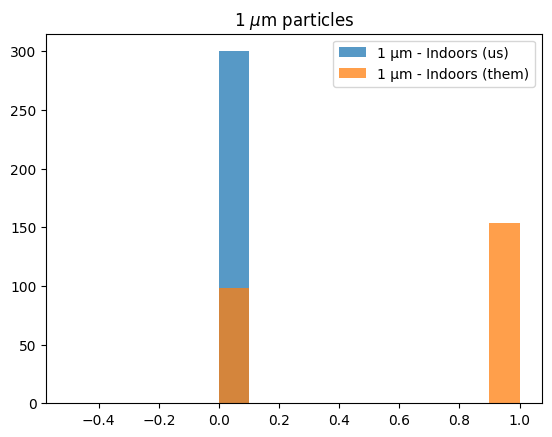

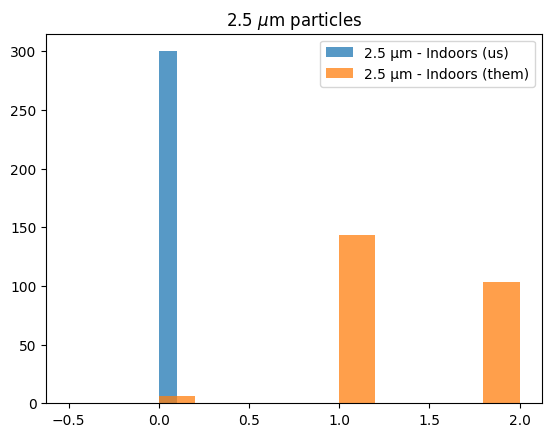

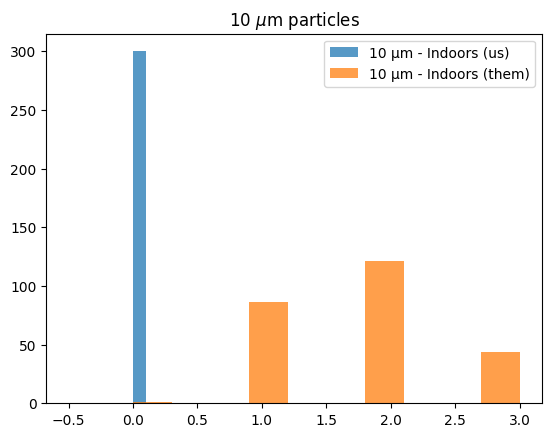

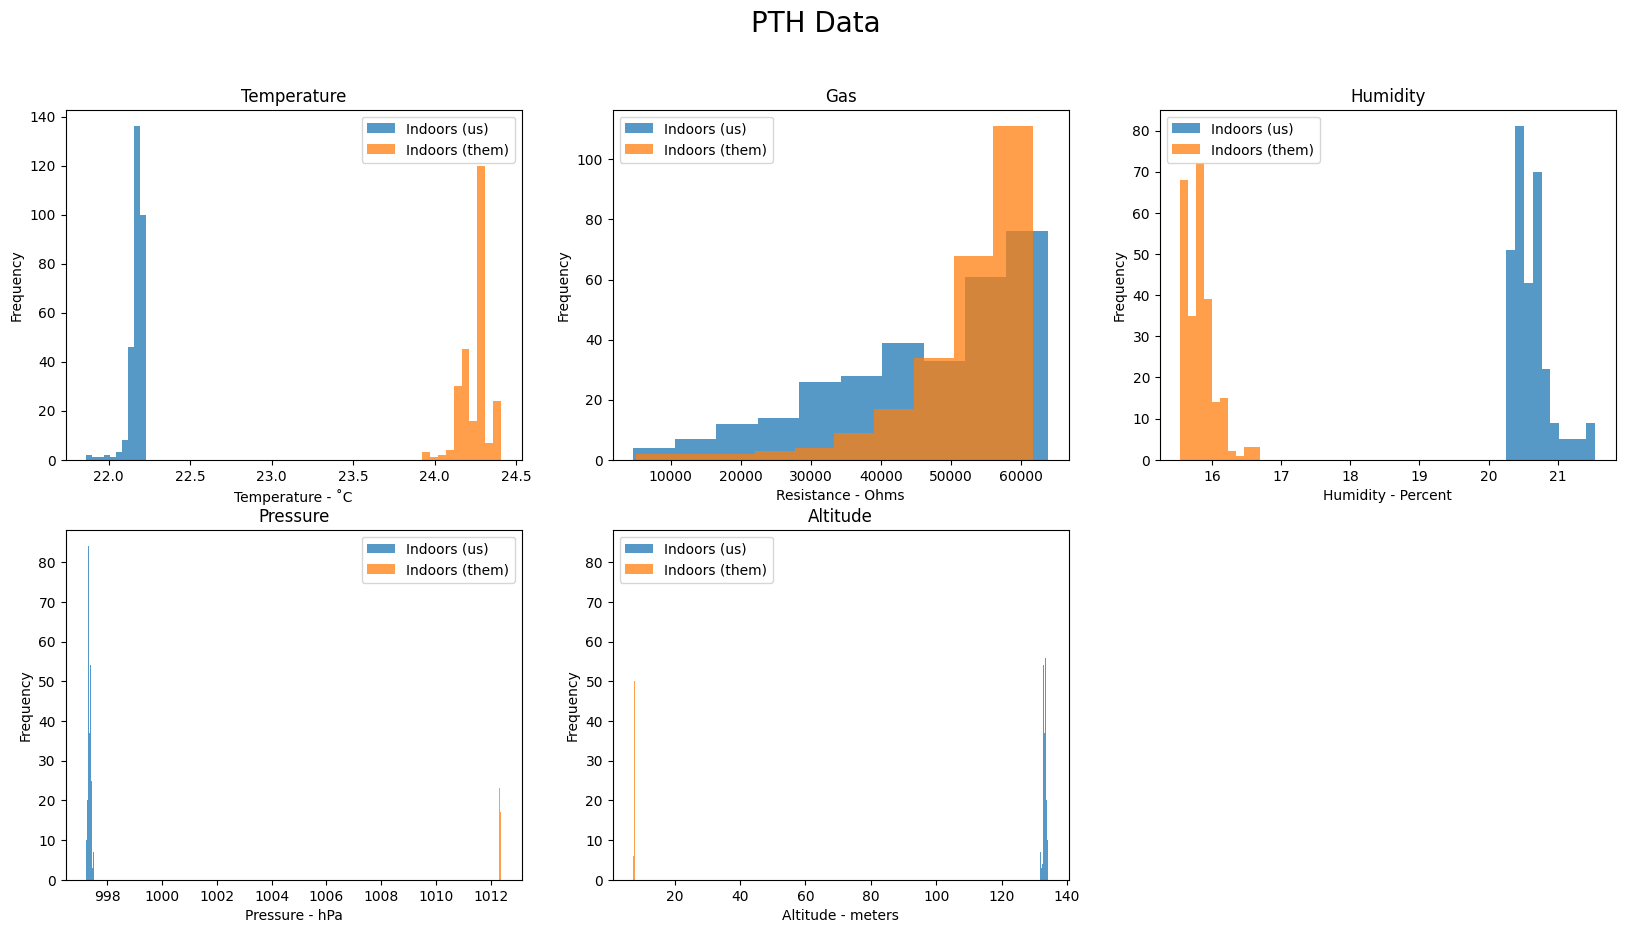

In [38]:
plotCSVhist(indoor, their_indoor, "Indoors (us)", "Indoors (them)")
plt.show()

In [39]:
their_indoor_mean = np.array(their_indoor.mean())
their_indoor_std = np.array(their_indoor.std())
their_indoor_zscore = (their_indoor_mean - indoor_mean[1:]) / indoor_std[1:]

C:\Users\carlo\AppData\Local\Temp\ipykernel_40556\850006663.py:3: RuntimeWarning: divide by zero encountered in true_divide
  their_indoor_zscore = (their_indoor_mean - indoor_mean[1:]) / indoor_std[1:]


In [40]:
print("Our indoor PM1.0 mean is %.2f. Their indoor PM1.0 mean is %.2f."
      %(indoor_mean[1], their_indoor_mean[0]))
print("Out indoor PM2.5 mean is %.2f. Their indoor PM2.5 mean is %.2f." \
    %(indoor_mean[2], their_indoor_mean[1]))
print("Our indoor PM10 mean is %.2f. Their indoor PM10 mean is %.2f." \
    %(indoor_mean[3], their_indoor_mean[2]))

print("Our indoor temperature mean is %.2f. Their indoor temperature mean is %.2f. \
Their indoor differs by %.1f of our indoor standard deviations" \
    %(indoor_mean[4], their_indoor_mean[3], their_indoor_zscore[3]))
print("Our indoor volatile gas mean is %.2f. Their indoor volatile gas mean is %.2f. \
Their indoor differs by %.1f of our indoor standard deviations" \
    %(indoor_mean[5], their_indoor_mean[4], their_indoor_zscore[4]))
print("The indoor humidity mean is %.2f. The outdoor humidity mean is %.2f. \
Their indoor differs by %.1f of our indoor standard deviations" \
    %(indoor_mean[6], their_indoor_mean[5], their_indoor_zscore[5]))

Our indoor PM1.0 mean is 0.00. Their indoor PM1.0 mean is 0.61.
Out indoor PM2.5 mean is 0.00. Their indoor PM2.5 mean is 1.38.
Our indoor PM10 mean is 0.00. Their indoor PM10 mean is 1.83.
Our indoor temperature mean is 22.17. Their indoor temperature mean is 24.25. Their indoor differs by 41.9 of our indoor standard deviations
Our indoor volatile gas mean is 46426.53. Their indoor volatile gas mean is 52015.70. Their indoor differs by 0.4 of our indoor standard deviations
The indoor humidity mean is 20.62. The outdoor humidity mean is 15.82. Their indoor differs by -17.5 of our indoor standard deviations


Our indoor temperature and humidity measurements are quite far apart. There are two possibilities. Either there was a different temperature and humidity inside Etcheverry on the days we took our measurements (which were different), or our sensors aren't calibrated the same. The first possibility seems more likely, or at least to be the larger contribution to the discrepancy we observe. <br>
The other group also observed particulates indoors, which we did not. Either the particulates made in inside on the day they took their measurements, or our particulate matter sensor was not as sensitive as theirs.

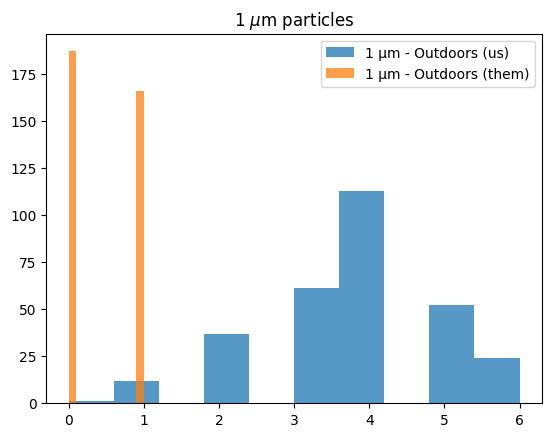

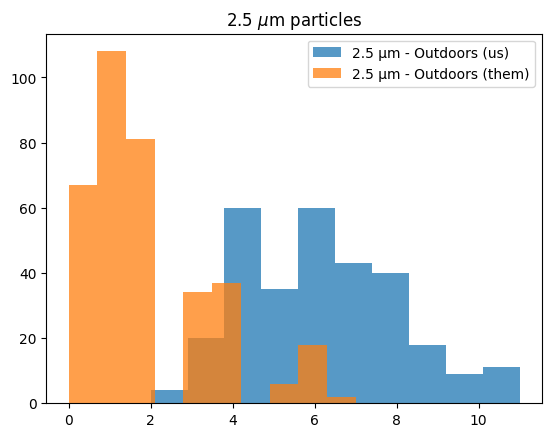

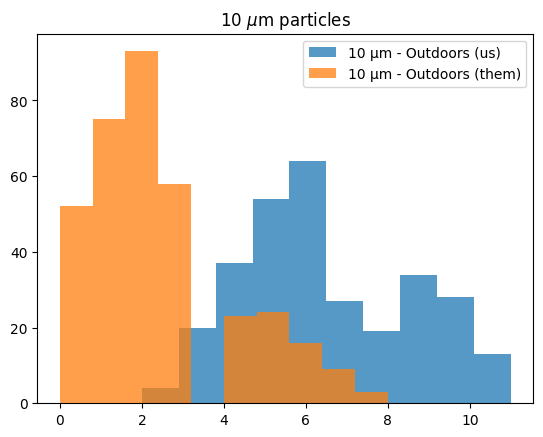

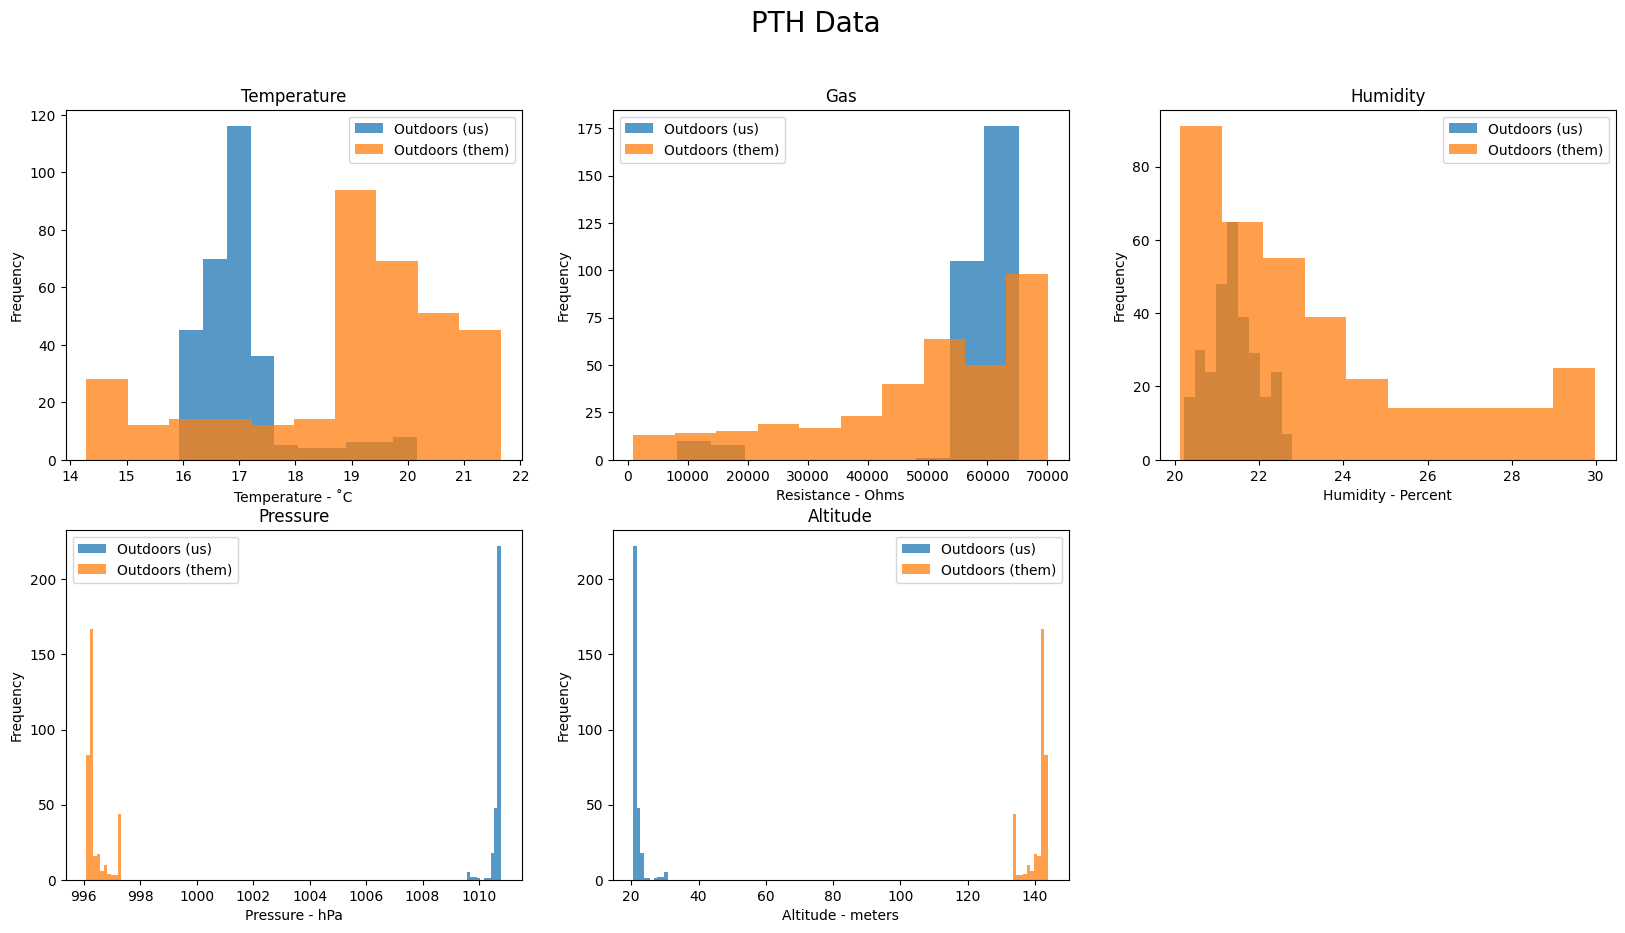

In [41]:
plotCSVhist(outdoor, their_outdoor, "Outdoors (us)", "Outdoors (them)")
plt.show()

In [42]:
their_outdoor_mean = np.array(their_outdoor.mean())
their_outdoor_std = np.array(their_outdoor.std())
their_outdoor_zscore = (their_outdoor_mean - outdoor_mean[1:]) / outdoor_std[1:]
print(their_outdoor_zscore)

[ -2.63777179  -2.02489124  -1.8001704    2.3464966   -0.82398733
   3.2141807  -73.07378486  73.47046124]


In [43]:
print("Our outdoor PM1.0 mean is %.2f. Their outdoor PM1.0 mean is %.2f. \
Their outdoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[1], their_outdoor_mean[0], their_outdoor_zscore[0]))
print("Out outdoor PM2.5 mean is %.2f. Their outdoor PM2.5 mean is %.2f. \
Their outdoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[2], their_outdoor_mean[1], their_outdoor_zscore[1]))
print("Our outdoor PM10 mean is %.2f. Their outdoor PM10 mean is %.2f. \
Their outdoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[3], their_outdoor_mean[2], their_outdoor_zscore[2]))

print("Our outdoor temperature mean is %.2f. Their outdoor temperature mean is %.2f. \
Their outdoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[4], their_outdoor_mean[3], their_outdoor_zscore[3]))
print("Our outdoor volatile gas mean is %.2f. Their outdoor volatile gas mean is %.2f. \
Their indoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[5], their_outdoor_mean[4], their_outdoor_zscore[4]))
print("Our outdoor humidity mean is %.2f. Their outdoor humidity mean is %.2f. \
Their outdoor differs by %.1f of our outdoor standard deviations" \
    %(outdoor_mean[6], their_outdoor_mean[5], their_outdoor_zscore[5]))

Our outdoor PM1.0 mean is 3.75. Their outdoor PM1.0 mean is 0.47. Their outdoor differs by -2.6 of our outdoor standard deviations
Out outdoor PM2.5 mean is 6.12. Their outdoor PM2.5 mean is 1.90. Their outdoor differs by -2.0 of our outdoor standard deviations
Our outdoor PM10 mean is 6.47. Their outdoor PM10 mean is 2.35. Their outdoor differs by -1.8 of our outdoor standard deviations
Our outdoor temperature mean is 17.01. Their outdoor temperature mean is 19.02. Their outdoor differs by 2.3 of our outdoor standard deviations
Our outdoor volatile gas mean is 58270.89. Their outdoor volatile gas mean is 48582.36. Their indoor differs by -0.8 of our outdoor standard deviations
Our outdoor humidity mean is 21.39. Their outdoor humidity mean is 23.29. Their outdoor differs by 3.2 of our outdoor standard deviations


Interestingly, while indoors, they recorded more particulates, outside, we recorded more. This confirms that the discrepancy does not stem primarily from the detectors. Rather, there were more particulates outside on the day we took our measurements. This is a perfectly reasonable explanation, as we see considerable variation in particulates over time, say, when there is a fire up north. <br>
They also have more spread in their temperature, gas, and humidity data. This indicates that our PTH sensor was more precise, or that the weather was changing more rapidly over the period when the other group took their measurements.

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.